<a href="https://colab.research.google.com/github/trprince21/STATS101C_notes/blob/main/STATS101C_Week1_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets observe the bias-variance trade-off with simulated data (bias in this case is the error with respect to our model of the data rather than biasedness in the coefficient estimation sense. $E[\hat{\beta}] = \beta$ vs $E[f(x) - \hat{f}(x)]$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
np.random.seed(1) # pseudo-number generator
n = 1000 # sample size: 1000

X = np.sort(10 * np.random.rand(n, 1), axis = 0) # uniform random variable (0,10)
#y = np.sin(X) + np.random.normal(0, 0.2, size= n)
y = np.sin(X) + np.random.normal(0, 0.2, size= X.shape) # If we do size = n, we have a array (1000,1) + (1000,1)
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


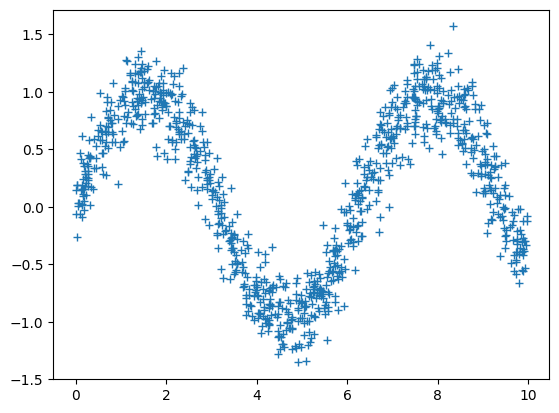

In [10]:
plt.plot(X,y,'+')
plt.show()



In [11]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train[:10])
print(y_train[:10])

[[3.94875613]
 [9.91346509]
 [9.82490945]
 [0.32426325]
 [5.26425934]
 [6.32615817]
 [0.15533276]
 [3.75091018]
 [3.45297462]
 [9.49016321]]
[[-0.98516869]
 [-0.29473225]
 [-0.02236554]
 [ 0.77735404]
 [-0.94702175]
 [-0.13490655]
 [ 0.1098617 ]
 [-0.40070565]
 [-0.35861482]
 [-0.25761143]]


Polynomial function (k) - 1 -> 40 Observe test_error for each of these functions

X ~ Uniform(0,10)

Y = sin(X) + N(0,0.2)

X = np.sort(10 * np.random.rand(n,1), axis=0)

y = np.sin(X) + np.random.normal(0,0.2, size= X.shape)

In [12]:

# degrees = [1,2,3,4,5,10,15,20,40]
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train) # X_train, X_train^2, X_train^3
X_poly_test = poly.transform(X_test)

# Train linear regression on the tranformed polynomial features
model = LinearRegression()
model.fit(X_poly_train, y_train) # -> y_train ~ X_train + X_train^2 + X_train^3 + intercept

# Predict on training and testing data
y_train_pred = model.predict(X_poly_train) # training data predictions
y_test_pred = model.predict(X_poly_test) # testing data predictions

# Calculate Mean Squared Error (MSE) for both training and testing sets
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))




0.35451407241524907
0.4084678438207392


Calculate bias and variance separately